In [35]:
import numpy
from matplotlib import pyplot, cm
%matplotlib inline

In [36]:
nx = 41
ny = 41

l = 1.
h = 1.

dx = l/(nx-1)
dy = h/(ny-1)

target = 1e-6
u = 1

In [37]:
w = numpy.zeros((nx,ny))
w[-1,:] = -3/dy
w

array([[   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       ..., 
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [-120., -120., -120., ..., -120., -120., -120.]])

In [38]:
psi = numpy.zeros_like(w)


In [39]:
def L1norm(new, old):
    norm = numpy.sum(numpy.abs(new-old))
    return norm

In [40]:
wuchaw = 1
wuchapsi = 1

In [41]:
wn = w.copy()
psin = psi.copy()

In [42]:
while wuchaw>target or wuchapsi>target:
    
    

    

    
    
    wn = w.copy()

    w[1:-2,1:-1] = 0.25*(wn[1:-2,2:] + wn[1:-2, :-2] + wn[2:-1, 1:-1] + wn[:-3, 1:-1])
    w[-2,1:-1] = 0.25*(wn[-2,2:] + wn[-2,:-2] + wn[-3,1:-1] + ((-1/2*dy**2)*(8*psin[-3,1:-1] - psin[-4,1:-1]) - 3*u/dy))
       
    wuchaw = L1norm(w,wn)
    
    psin = psi.copy()
    psi[1:-1,1:-1] = 1/(2*(dx**2 + dy**2)) * \
                        ((psin[1:-1,2:]+psin[1:-1,:-2])*dy**2 +\
                        (psin[2:,1:-1] + psin[:-2,1:-1])*dx**2 -\
                         w[1:-1,1:-1]*dx**2*dy**2)
    wuchapsi = L1norm(psi, psin)

    
    
    
    
    
    

    


In [43]:
x = numpy.linspace(0, 1, nx)
y = numpy.linspace(0, 1, ny)
X, Y = numpy.meshgrid(x,y)

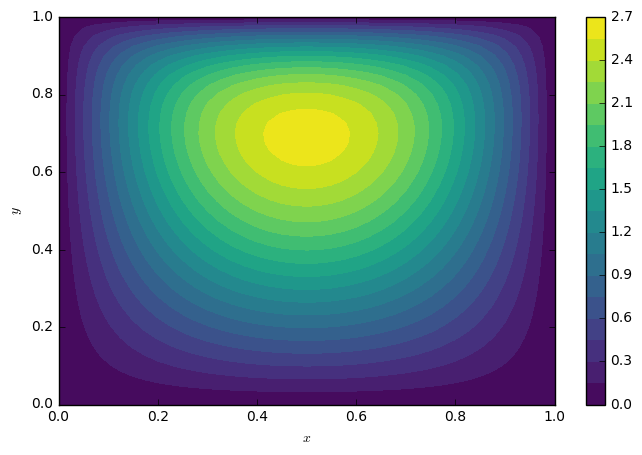

In [44]:
pyplot.figure(figsize=(8,5))
pyplot.contourf(X,Y,psi,20,cmap=cm.viridis)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar();

In [45]:
numpy.round(psi[32,::8], 4)

array([ 0.    ,  1.5416,  2.3227,  2.3227,  1.5416,  0.    ])